In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# function to plot 2 images side by side
plt.rcParams['figure.figsize']=(20,20)
def plot_images(left, right):
    plt.subplot(121)
    left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
    plt.imshow(left)
    plt.axis('off')
    plt.subplot(122)
    right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)
    plt.imshow(right)
    plt.axis('off')

In [15]:
# read images
left = cv2.imread('./ORB_images/1.jpeg')
right = cv2.imread('./ORB_images/2.jpeg')

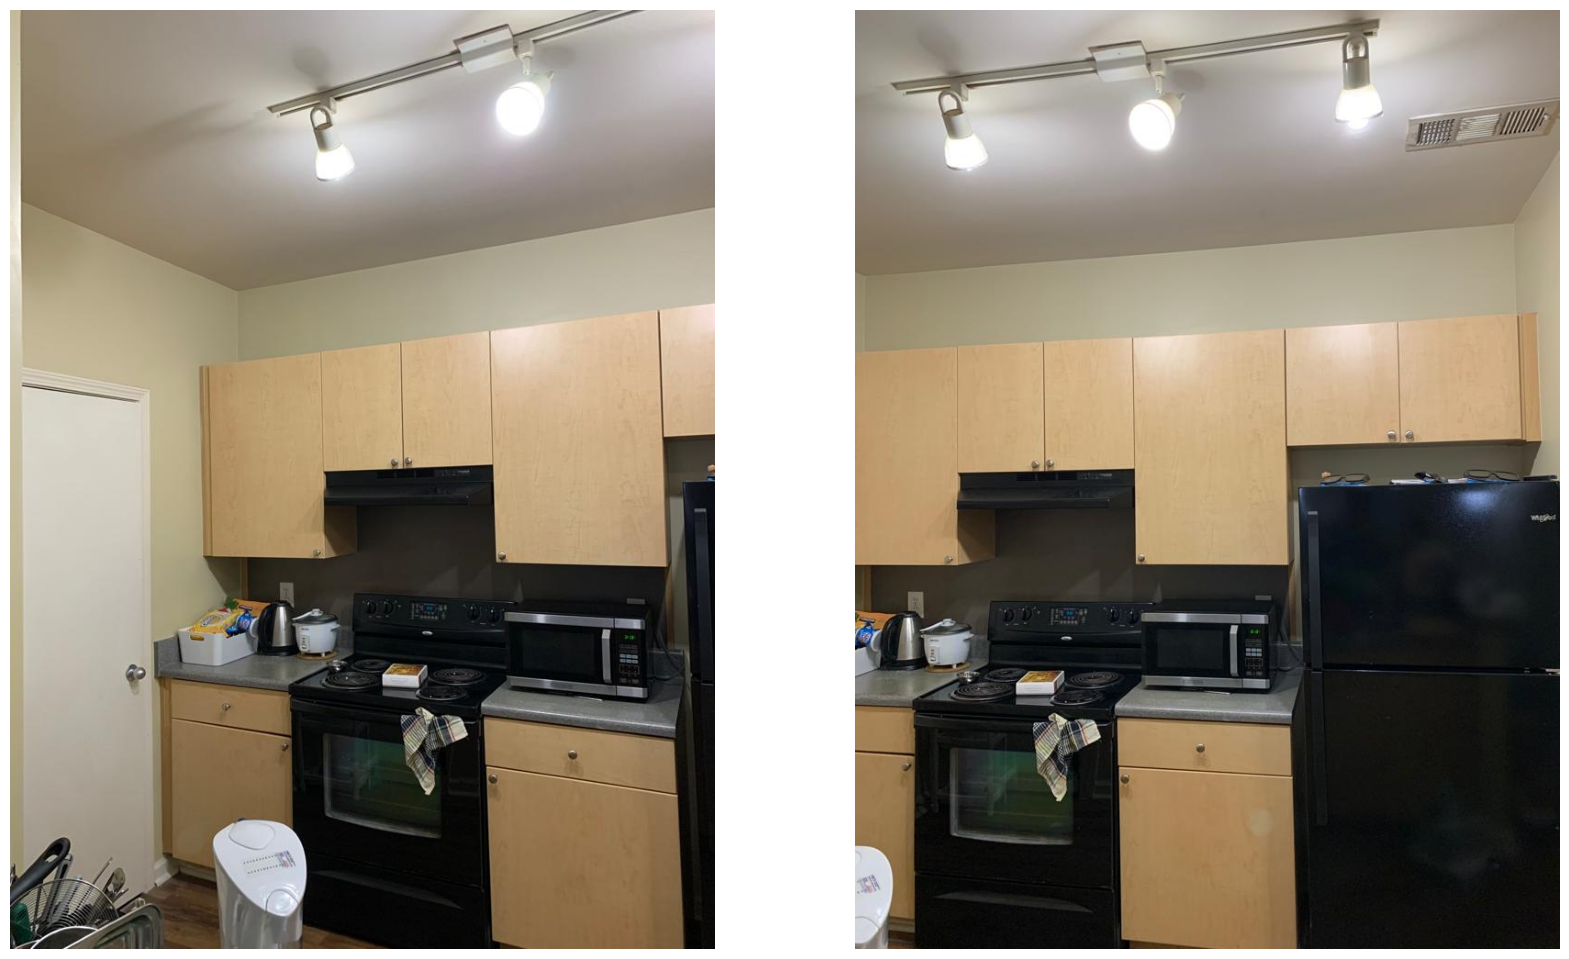

In [16]:
plot_images(left, right)

In [17]:
# create ORB object
orb = cv2.ORB_create()
# find keypoints and descriptors
key_l, output_l = orb.detectAndCompute(left, None)
key_r, output_r = orb.detectAndCompute(right, None)

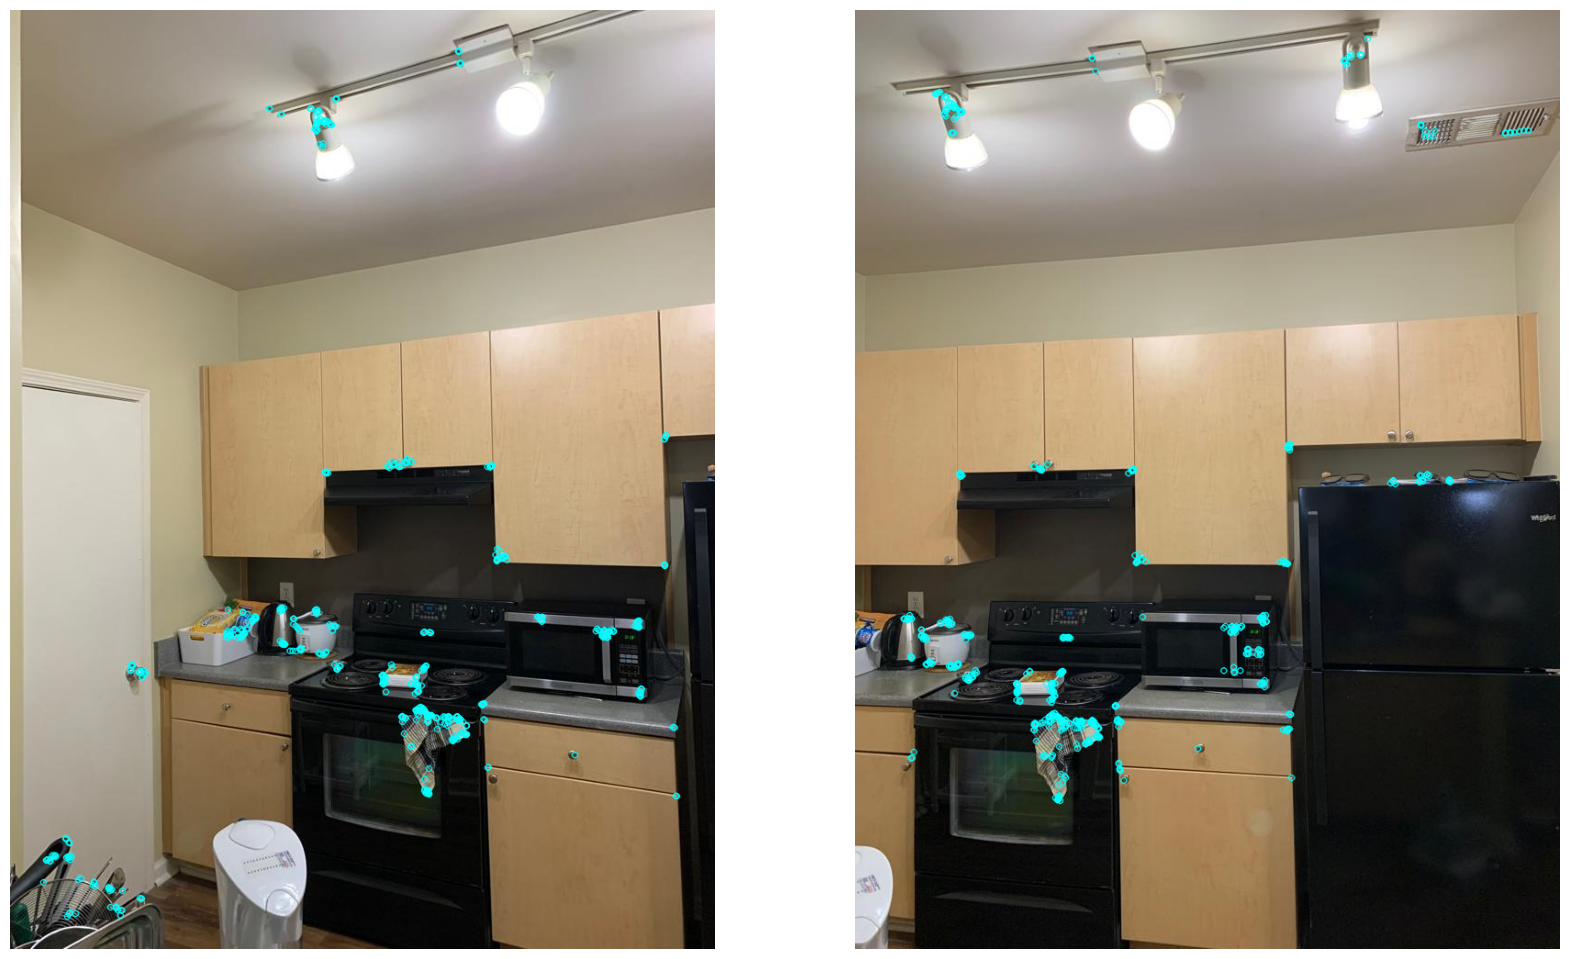

In [18]:
# draw keypoints
keypoints_l = cv2.drawKeypoints(left, key_l, None, color=(255,255,0))
keypoints_r = cv2.drawKeypoints(right, key_r, None, color=(255, 255, 0))

plot_images(keypoints_l, keypoints_r)

In [19]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors
matches = bf.match(output_l,output_r)

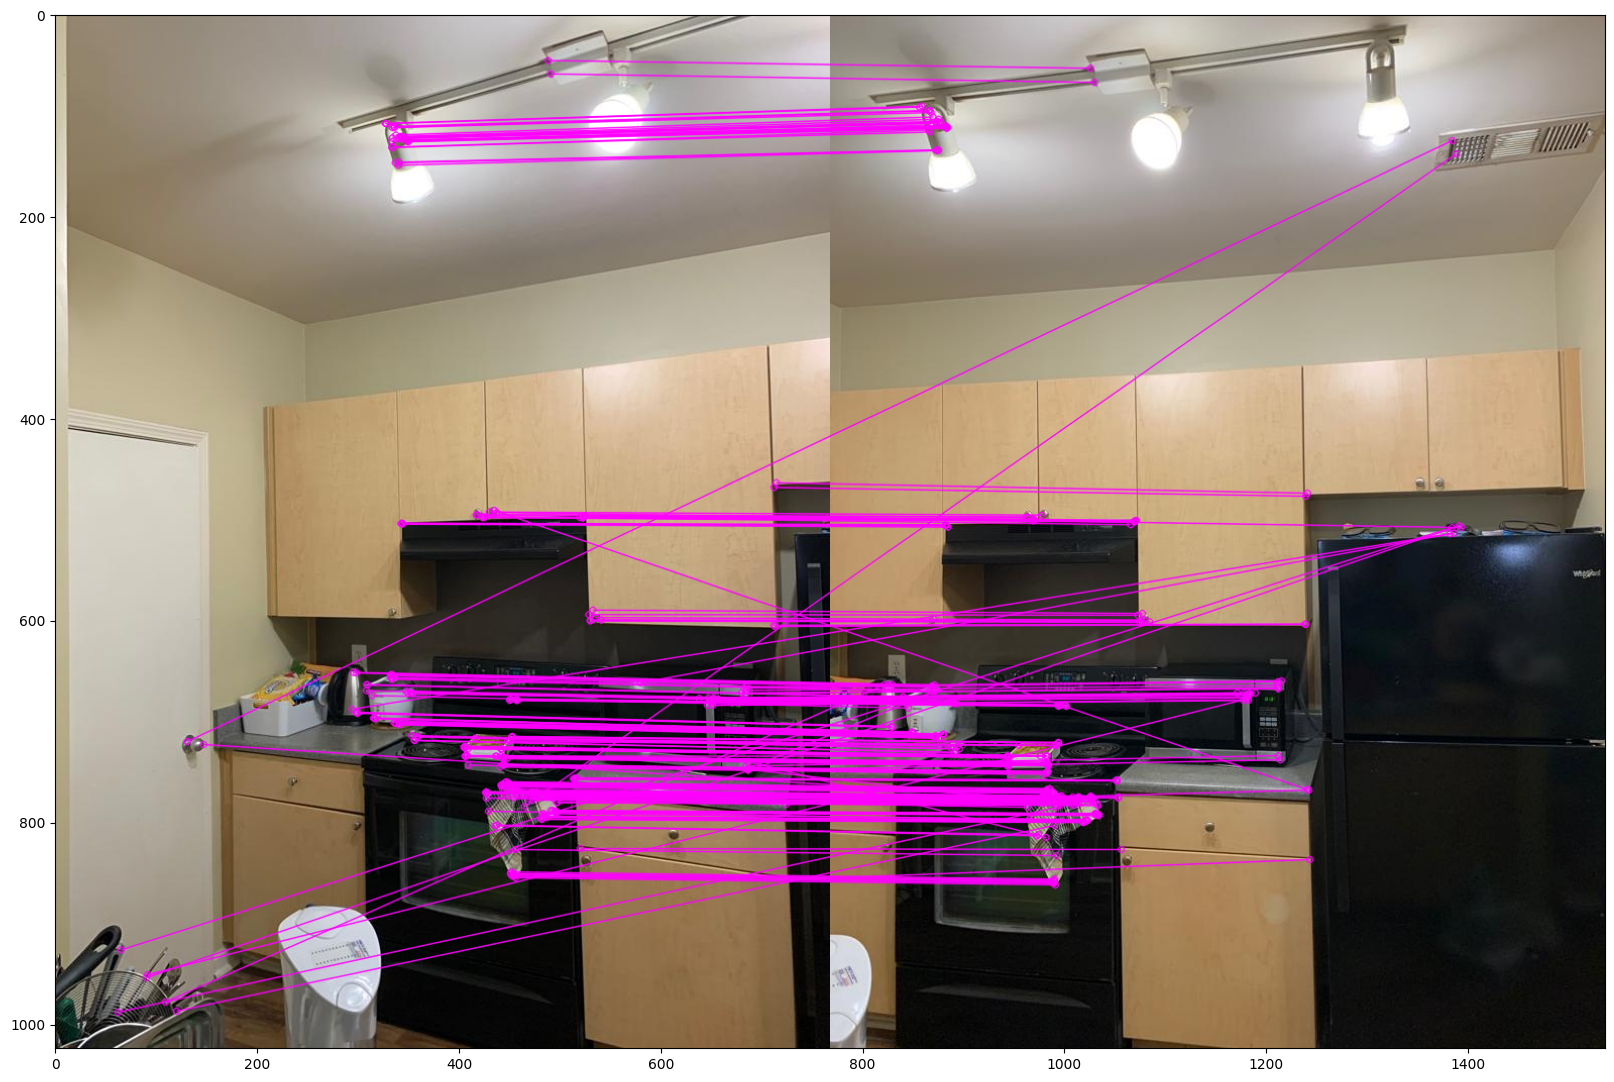

In [22]:
# Sort them in the order of their distance
matches_drawn = cv2.drawMatches(left, key_l, right, key_r, matches, None, matchColor=(255,0,255), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

matches_drawn = cv2.cvtColor(matches_drawn, cv2.COLOR_BGR2RGB)
plt.imshow(matches_drawn)

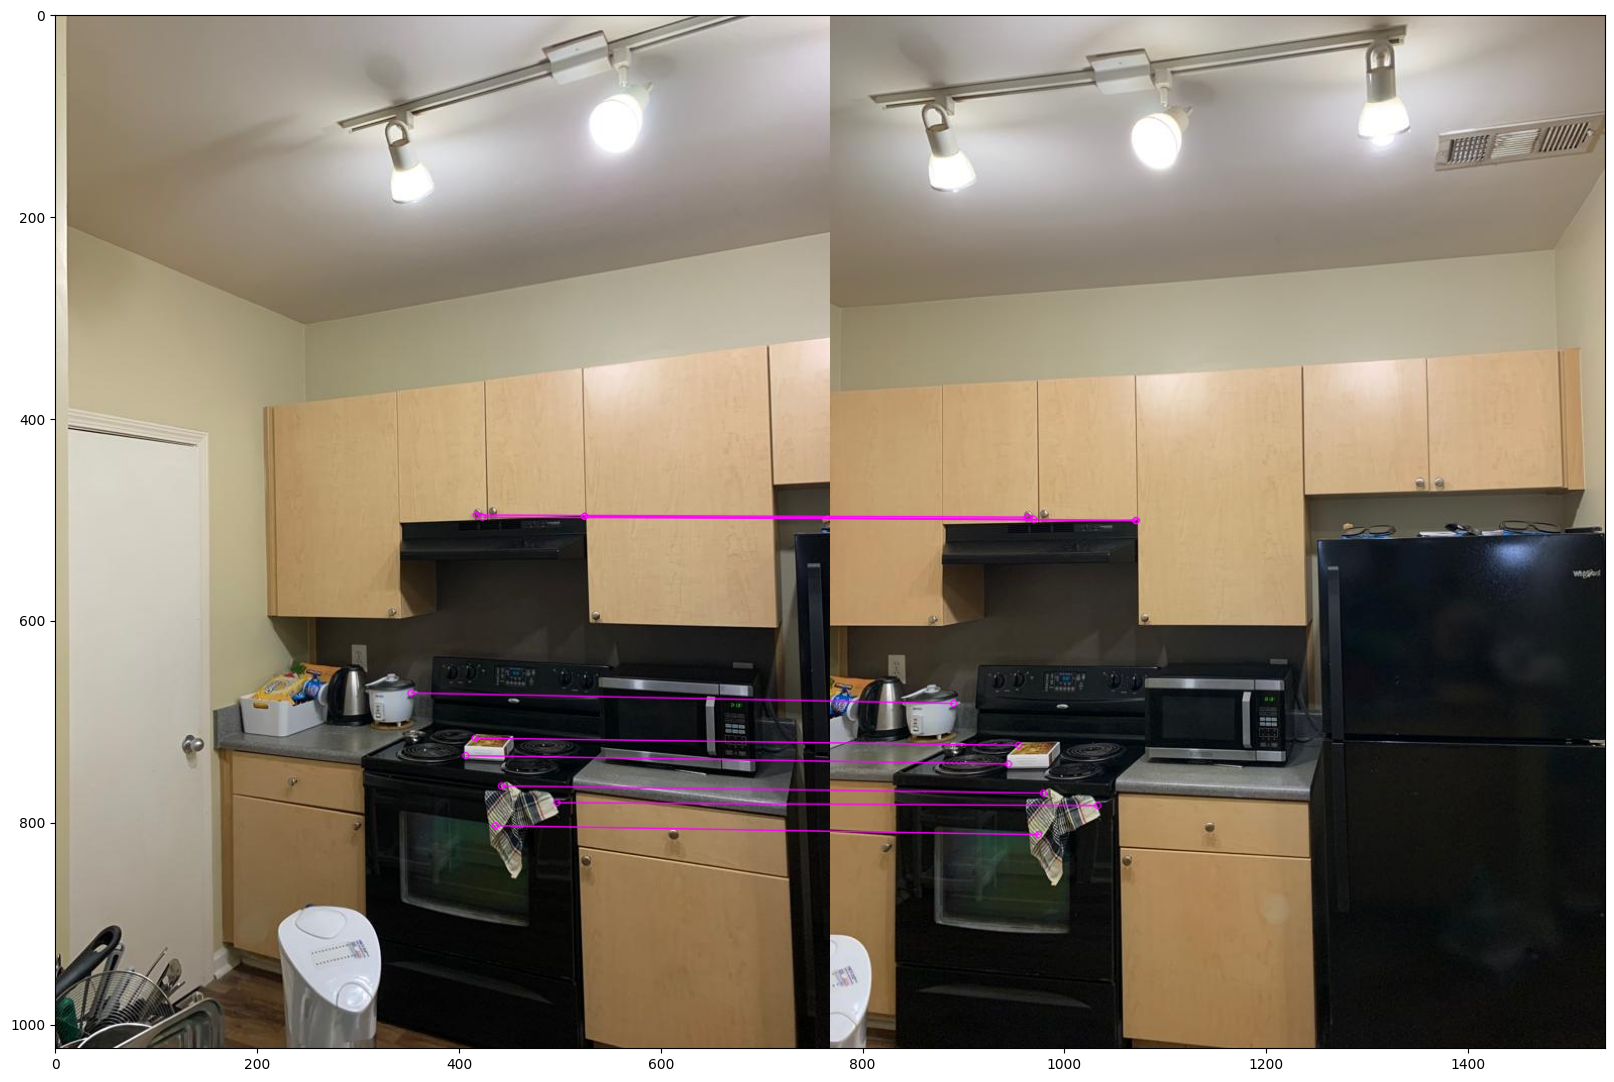

In [23]:
# Sort them in the order of their distance
limit = 10
best = sorted(matches, key = lambda x:x.distance)[:limit]\
# Draw first 10 matches.
best_matches_drawn = cv2.drawMatches(left, key_l, right, key_r, best, None, matchColor=(255,0,255), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
best_matches_drawn = cv2.cvtColor(best_matches_drawn, cv2.COLOR_BGR2RGB)
plt.imshow(best_matches_drawn)

In [24]:
# save matched points in 2 lists
left_pts = []
right_pts = []
for m in best:
    l = key_l[m.queryIdx].pt
    r = key_r[m.trainIdx].pt
    left_pts.append(l)
    right_pts.append(r)

In [25]:
# compute homography
M, _ = cv2.findHomography(np.float32(right_pts), np.float32(left_pts))

In [26]:
# warp image
dim_x = left.shape[1] + right.shape[1]
dim_y = max(left.shape[0], right.shape[0])
dim = (dim_x, dim_y)

warped = cv2.warpPerspective(right, M, dim)

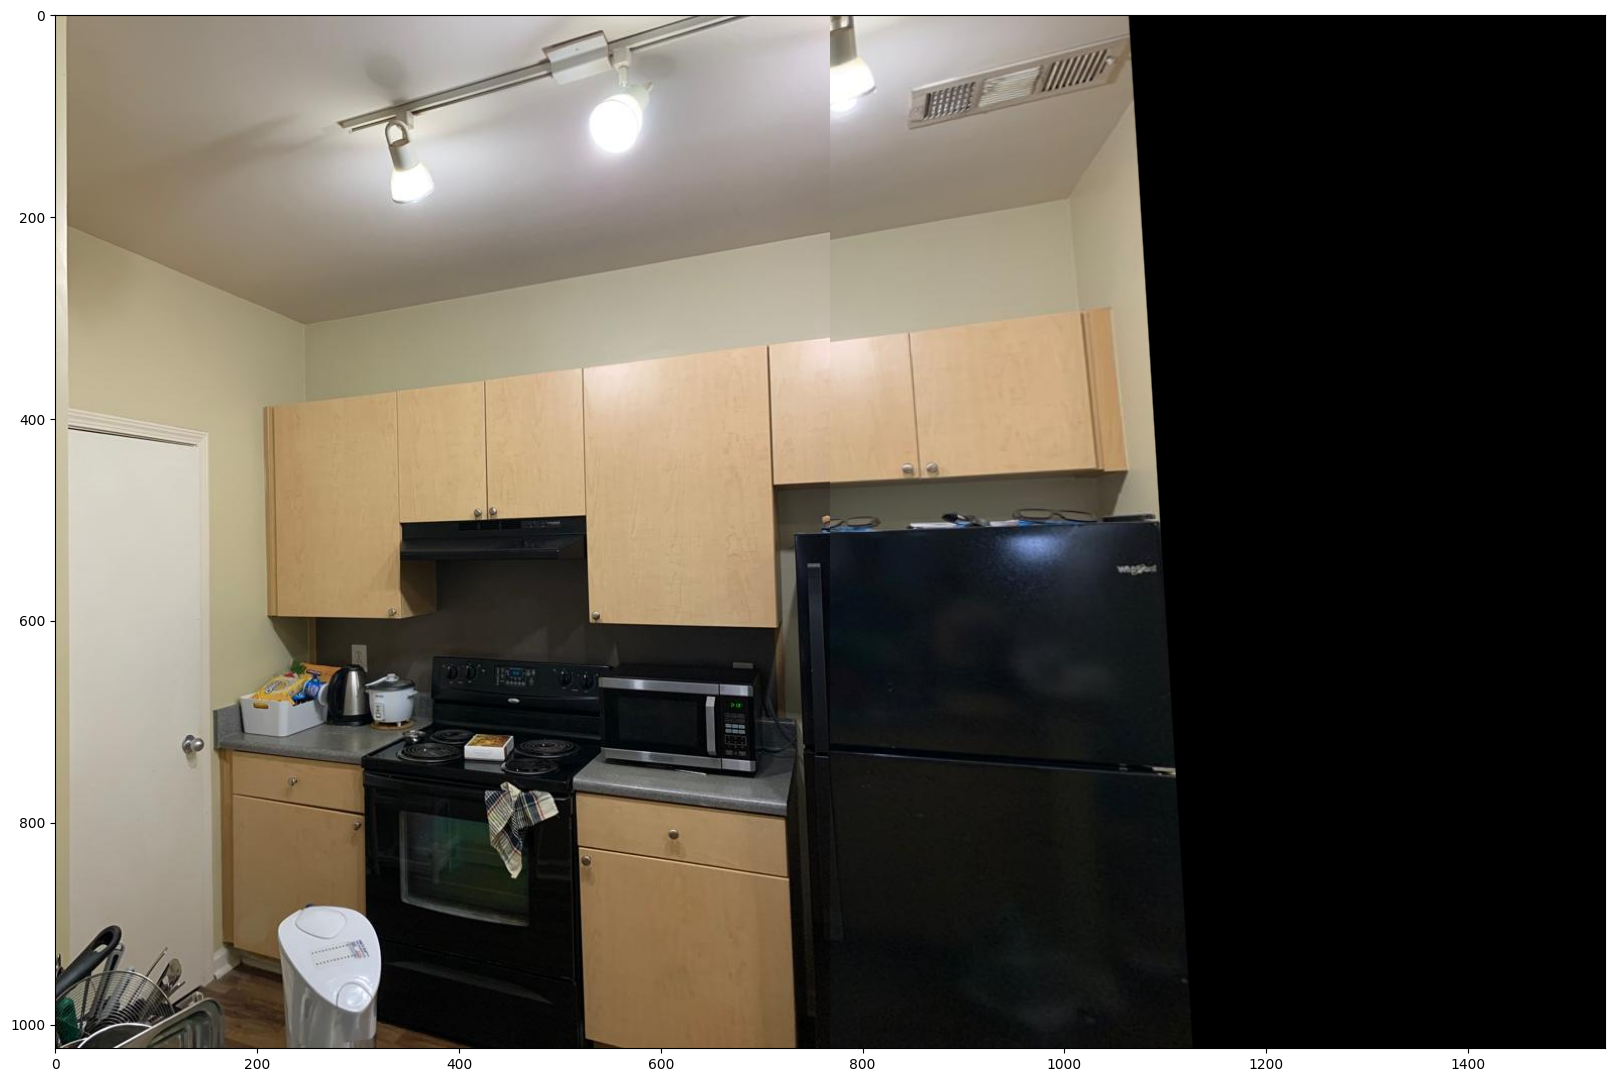

In [27]:
comb = warped.copy()
# combine the two images
comb[0:left.shape[0],0:left.shape[1]] = left
# crop
r_crop = 1920
comb = comb[:, :r_crop]
comb = cv2.cvtColor(comb, cv2.COLOR_BGR2RGB)
plt.imshow(comb)